# OpenCV Advanced

In [1]:
# Import Require Packages
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


## Color Space  

In [3]:
img = cv.imread('./Resources/Photos/park.jpg')
cv.imshow('Park', img)

# BGR to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV', hsv)

# BGR to L*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('LAB', lab)

# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)

# HSV to BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('LAB --> BGR', lab_bgr)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Color Channel 

In [ ]:
img = cv.imread('./Resources/Photos/park.jpg')
cv.imshow('Park', img)


In [ ]:

blank = np.zeros(img.shape[:2], dtype='uint8')

b, g, r = cv.split(img)

blue = cv.merge([b, blank, blank])
green = cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])


cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

merged = cv.merge([b, g, r])
cv.imshow('Merged Image', merged)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Smoothing 

In [3]:
img = cv.imread('./Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

# Averaging
average = cv.blur(img, (7, 7))
cv.imshow('Average Blur', average)

# Gaussian Blur
gauss = cv.GaussianBlur(img, (3, 3), 0)
cv.imshow('Gaussian Blur', gauss)

# # Median Blur
median = cv.medianBlur(img, 3)
cv.imshow('Median Blur', median)

# # Bilateral
bilateral = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow('Bilateral', bilateral)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Bitwise Opreations

In [2]:
blank = np.zeros((400, 400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)
circle = cv.circle(blank.copy(), (200, 200), 200, 255, -1)

cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)

# # bitwise AND --> intersecting regions
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow('Bitwise AND', bitwise_and)

# # bitwise OR --> non-intersecting and intersecting regions
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow('Bitwise OR', bitwise_or)

# # bitwise XOR --> non-intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow('Bitwise XOR', bitwise_xor)

# # bitwise NOT
bitwise_not = cv.bitwise_not(circle)
cv.imshow('Circle NOT', bitwise_not)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Masking

In [3]:
img = cv.imread('../Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

circle = cv.circle(
    blank.copy(), (img.shape[1]//2 + 45, img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)

weird_shape = cv.bitwise_and(circle, rectangle)
cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_and(img, img, mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Histogram Computation 

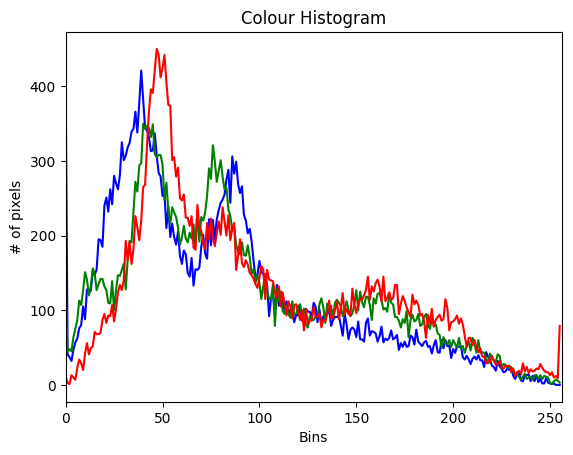

In [9]:
img = cv.imread('./Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)
cv.imshow('Mask', masked)

# GRayscale histogram
# gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256] )

# plt.figure()
# plt.title('Grayscale Histogram')
# plt.xlabel('Bins')
# plt.ylabel('# of pixels')
# plt.plot(gray_hist)
# plt.xlim([0,256])
# plt.show()

# Colour Histogram

plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.show()

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Thresholding/Binarizing Images

In [2]:
img = cv.imread('./Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow('Simple Thresholded', thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow('Simple Thresholded Inverse', thresh_inv)

# Adaptive Thresholding
adaptive_thresh = cv.adaptiveThreshold(
    gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
cv.imshow('Adaptive Thresholding', adaptive_thresh)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows


## Edge Detection 

In [6]:
img = cv.imread('./Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

# Sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)
cv.imshow('Combined Sobel', combined_sobel)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)

cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows
